<a href="https://colab.research.google.com/github/jjlee6496/one-by-one/blob/main/%ED%81%AC%EB%A1%A4%EB%A7%81/%EC%A7%80%EC%A7%80%EA%B3%A0%EB%A7%A4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제1 : 뉴스 검색, "빅데이터", 유사도순, 1~110번 제목만 출력

In [ ]:
import os
import sys

import datetime
import time
import json

# 반드시 자기 id 로  넣기 
client_id = 'yE6shSqMnuumAKFFHieO'
client_secret = 'Gax7SfIJFs'

LEC=True

In [ ]:
import urllib.request

def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
        
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

In [ ]:
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   #[CODE 1]
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode) # json decode
def getSearchTitle(node, srcText, start, display):
    json_list = []
    display_cnt = display

    while display_cnt > 100:
      json_list.append(getNaverSearch(node, srcText, start, 100))
      start += 100
      display_cnt -= 100
    if display_cnt >0:
      json_list.append(getNaverSearch(node, srcText, start, display_cnt % 100))

    result =[]
    for jsons in json_list:
      for item in jsons['items']:
        result.append(item['title'])
    return result

In [ ]:
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    start = 1
    display = int(input('검색할 개수를 입력하세요: '))

    jsonResult = []    
    jsonResponse = getSearchTitle(node, srcText, start, display) 

    for i, title in enumerate(jsonResponse):
      print(f'{i+1} \t {title}')

    print("가져온 데이터 : %d 건" %(display))
    
if __name__ == '__main__':
    main()

검색어를 입력하세요: 빅데이터
검색할 개수를 입력하세요: 110
[2022-03-27 05:37:10.804963] Url Request Success
[2022-03-27 05:37:11.785082] Url Request Success
1 	 LG전자, 'ESG 대학생 아카데미' 8기 발대식 개최
2 	 KT부산경남광역본부, AI/DX기반 주거문화 트렌드 변화 세미나 개최
3 	 가상인간 로지, 2030부산세계박람회 디지털 홍보 맡는다
4 	 LG전자, ESG 인재 키운다…대학생 대상 아카데미 진행
5 	 쿠팡 대구물류센터 준공, 지역경제 기여 기대한다
6 	 수리硏-다이텍연구원, 섬유산업 AI·<b>빅데이터</b> 활용 MOU
7 	 세종시, &quot;<b>빅데이터</b> 활용, 체납자 맞춤형 징수활동&quot;
8 	 세종시, 지방세 <b>빅데이터</b> 체납분석… '맞춤형 징수'키로
9 	 카드사, 개인사업자 신용평가 사업 진출 속도
10 	 LG전자 'ESG 인재' 키운다...대학생 아카데미 진행
11 	 LG전자, 더 나은 미래 위해 ‘ESG 인재’ 키운다
12 	 [부고]김선진(전 KIA 타이거즈 코치)씨 부친상
13 	 에듀윌 토익, 토익시험 채점·해설 유튜브 생방송 진행
14 	 LG전자 'ESG 대학생 아카데미' 발대식…&quot;미래세대 역량 강화&quot;
15 	 충남대병원·한미약품, 의료 <b>빅데이터</b> 기반 코호트 연구 협약
16 	 임영웅 1위, 3월 트로트 가수 브랜드평판 접수..2위 박군-3위 이찬원
17 	 한국인공지능협회-IBK기업은행-SBA, 인공지능 · <b>데이터</b> · IoT 등 디지털 혁...
18 	 “오늘 토익 가채점 확인”…에듀윌 토익, 초간단 채점 서비스 공개
19 	 LG전자, 'ESG 대학생 아카데미' 발대…'ESG 인재' 육성
20 	 트로트가수 평판 1위 임영웅…2위 박군·3위 이찬원
21 	 [인사] 우리은행, 부산일보, e대한경제
22 	 미래 ESG 인재 육성 나선 LG전자
23 	 

# 과제2: 테스트 유저의 birthday 출력하기

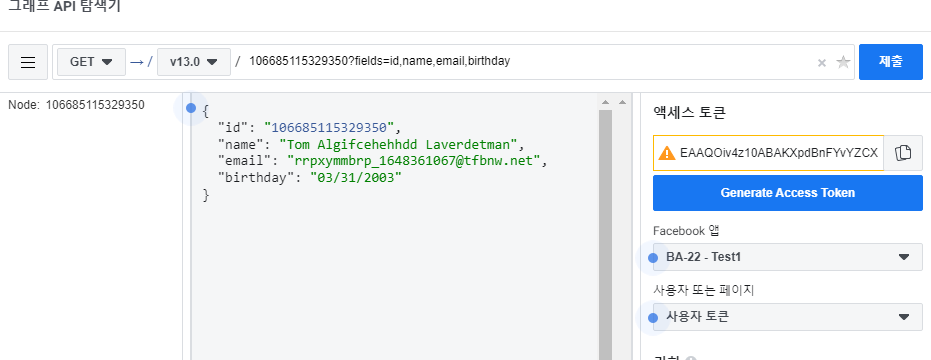

# 숙제1: 다른 프랜차이즈 가맹점 정보 크롤링해서 csv로 저장하기

사이트:

In [2]:
#SSL: CERTIFICATE_VERIFY_FAILED 에러 해결법
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [1]:
import urllib.request
url="http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=1"
html= urllib.request.urlopen(url)
print (html)

In [2]:
from bs4 import BeautifulSoup
soup= BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE doctype html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta contents="" name="author"/>
<meta content="" name="description"/>
<meta content="" name="keywords"/>
<meta content="매장찾기 1 페이지 | 지지고" name="og:title"/>
<meta content="" name="og:description"/>
<meta content="website" property="og:type"/>
<meta content="ko_KR" property="og:locale"/>
<meta content="http:///images/og_image.png" property="og:image"/>
<meta content="http:///bbs/board.php?bo_table=store" name="og:url">
<link href="http:///bbs/board.php?bo_table=store" rel="canonical"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"/>
<meta content="true" name="HandheldFriendly"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<link href="http://www.gggo.co.kr/images/favicon.ico" re

In [3]:
tbody = soup.find('tbody')
tbody

<tbody>
<tr class=" ">
<td class="td_ca">
<a class="fgmarket medium f16 fcred" href="http://www.gggo.co.kr/bbs/board.php?bo_table=store&amp;sca=%EA%B2%BD%EA%B8%B0%EB%8F%84">경기도</a>
</td>
<td class="td_subject td_tit" style="padding-left:0px">
<div class="bo_tit">
<a href="http://www.gggo.co.kr/bbs/board.php?bo_table=store&amp;wr_id=70&amp;page=1">
                                                                        동탄남광장점                    </a>
</div>
</td>
<td class="td_con noto fcgrey">경기 화성시 동탄중심상가1길 9 110호</td>
<td class="td_con noto fcgrey">031.8003.8053</td>
</tr>
<tr class=" ">
<td class="td_ca">
<a class="fgmarket medium f16 fcred" href="http://www.gggo.co.kr/bbs/board.php?bo_table=store&amp;sca=%EA%B4%91%EC%A3%BC%EA%B4%91%EC%97%AD%EC%8B%9C">광주광역시</a>
</td>
<td class="td_subject td_tit" style="padding-left:0px">
<div class="bo_tit">
<a href="http://www.gggo.co.kr/bbs/board.php?bo_table=store&amp;wr_id=69&amp;page=1">
                                                         

In [4]:
import re
result=[]
trs=tbody.find_all('tr')
i = 0
for tr in trs:
  tds = tr.find_all('td')

  b = trs[i].select('a')[1].get_text()
  name = re.findall('[가-힣]+',b)[0]

  a = trs[i].select('a')[0].get_text()
  sido = re.findall('[가-힣]+',a)[0]

  addr=tds[2].string
  phone=tds[3].string
  result.append([name,sido,addr,phone])
  i+=1

result

[['동탄남광장점', '경기도', '경기 화성시 동탄중심상가1길 9 110호', '031.8003.8053'],
 ['광주수완점', '광주광역시', '광주 광산구 임방울대로 352', '062.955.9024'],
 ['대구대실역점', '대구광역시', '대구 달성군 다사읍 달구벌대로 874', '053.586.3457'],
 ['일산후곡점', '경기도', '경기 고양시 일산서구 일산로 547 101호', '031-911-9919'],
 ['시흥대교점', '서울특별시', '서울 금천구 금하로 601', '02-807-4882'],
 ['대구테크노폴리스점', '대구광역시', '대구 달성군 유가읍 테크노중앙대로 254', '053-611-6129'],
 ['포항양덕점', '경상북도', '경북 포항시 북구 천마로72번길 33', '054-255-5196'],
 ['칠곡북삼점', '경상북도', '경북 칠곡군 북삼읍 금오대로10길 19-6', '054-977-5534'],
 ['양천구청점', '서울특별시', '서울 양천구 목동동로 53 118호', '02-2646-9990'],
 ['외대후문점', '서울특별시', '서울 동대문구 천장산로 26-2', '02-962-1114'],
 ['성균관대점', '서울특별시', '서울 종로구 명륜3길 11-6', '070-4320-0498'],
 ['동덕여대점', '서울특별시', '서울 성북구 화랑로13길 20', '02-909-7850'],
 ['천안백석대점', '충청남도', '충남 천안시 동남구 문암로 70', '041-556-6999'],
 ['광주조선대점', '광주광역시', '광주 동구 지산로 13', '062-223-2287']]

In [5]:
import re
a = trs[0].select('a')[1].get_text()
re.findall('[가-힣]+',a)

['동탄남광장점']

In [27]:
for page in range(1,6):
    ggo_url= "http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=%d"%page
    print (ggo_url)

http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=1
http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=2
http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=3
http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=4
http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=5


In [11]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime
import re

def ggo_store(result):
    for page in range(1,6):
        i = 0
        ggo_url= "http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=%d"%page
        print(ggo_url)
        html = urllib.request.urlopen(ggo_url)
        soupggo = BeautifulSoup(html, 'html.parser')
        tag_tbody = soupggo.find('tbody')
        trs = tag_tbody.find_all('tr')
        for store in trs:

            store_td = store.find_all('td')
            a = trs[i].select('a')[1].get_text() #시도와 이름은 href a 클래스에 있어서 따로 스트링 추출을 해주었습니다
            store_name = re.findall('[가-힣]+',a)[0]

            b = trs[i].select('a')[0].get_text()
            store_sido = re.findall('[가-힣]+',b)[0]

            store_address = store_td[2].string
            store_phone = store_td[3].string
            result.append([store_name]+[store_sido]+[store_address]
                          +[store_phone])
            i+=1
    return


def main():
    result = []
    print('Ggo store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    ggo_store(result)   #[CODE 1] 호출 
    ggo_tbl = pd.DataFrame(result, columns=('store', 'sido-gu', 'address','phone'))
    ggo_tbl.to_csv('ggo.csv', encoding='cp949', mode='w', index=True)
    del result[:]
       
if __name__ == '__main__':
     main()

Ggo store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>
http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=1
http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=2
http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=3
http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=4
http://www.gggo.co.kr/bbs/board.php?bo_table=store&page=5
